<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Team1/kaggle_challenge_team_1/blob/main/Kaggle_Challenge_Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
## our Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
# Read the CSV file using pandas
train_data = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0105-2023-Team1/kaggle_challenge_team_1/main/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0105-2023-Team1/kaggle_challenge_team_1/main/test.csv')
sample_submission_data = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0105-2023-Team1/kaggle_challenge_team_1/main/sample_submission.csv')

# Display the first few rows of the DataFrame
print(train_data.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## our Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

## Model Evaulations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score,accuracy_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Display the first few rows of the DataFrame
print(test_data.head())


In [ ]:
# Display the first few rows of the DataFrame
print(sample_submission_data.head())

In [6]:
# checking size of data frame
train_data.shape

(8693, 14)

In [ ]:
train_data.describe()


In [ ]:
# checking dtype of all columns
train_data.dtypes

In [ ]:
# checking the unique values
train_data.nunique()

In [11]:
# checkink columns separately
train_data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [12]:
# to check the null values
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
# adjusting columns
droplane = train_data.drop(['CryoSleep', 'Cabin' , 'VIP' , 'Destination' , 'Transported'], axis = 1)
droplane.head()

<Axes: >

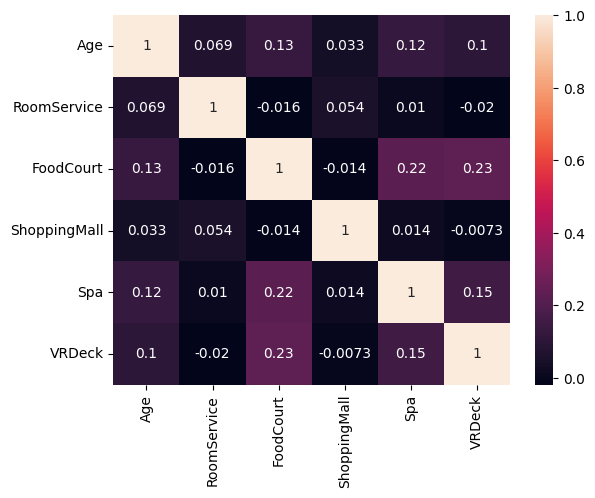

In [14]:
# explaining the corelation matrix
corelation = droplane.corr(numeric_only=True)
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

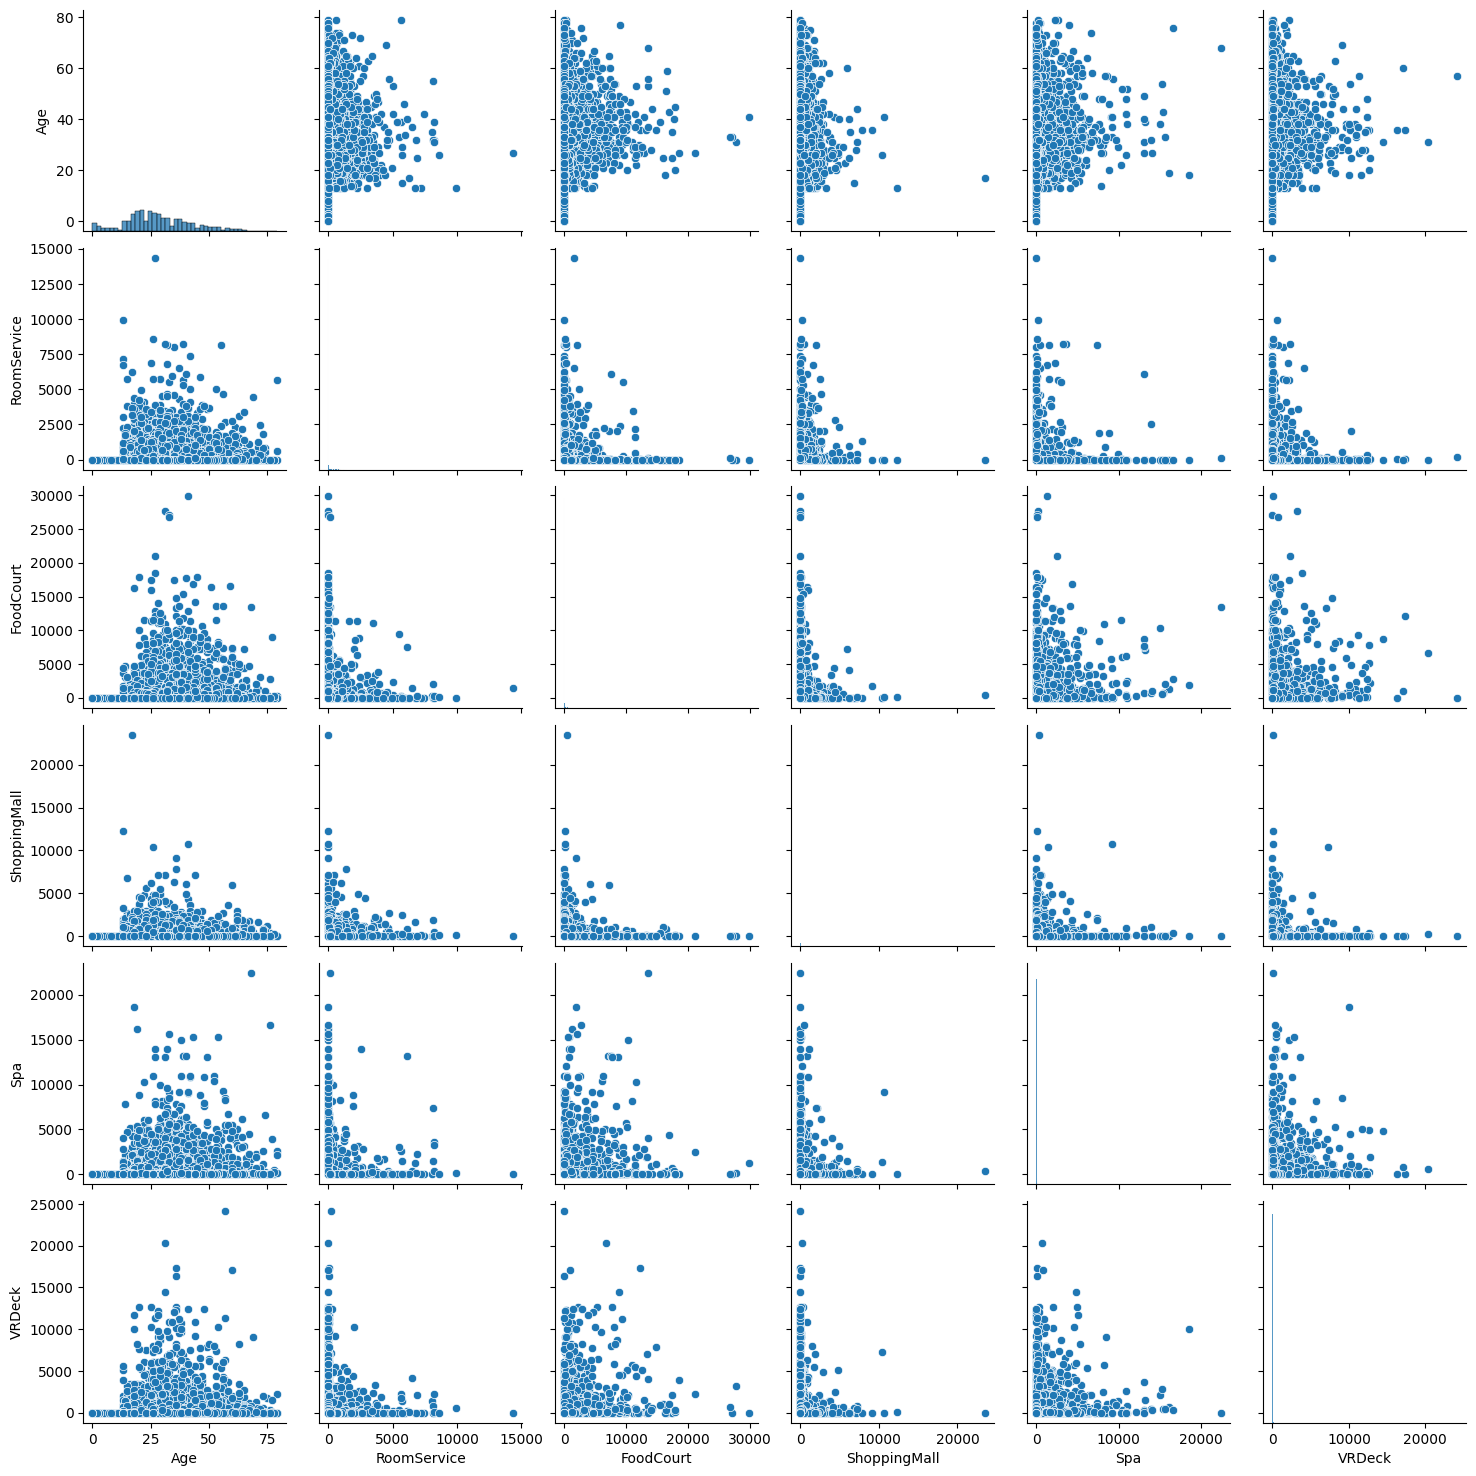

In [ ]:
# Explaining the selected columns in terms of pair plots
sns.pairplot(droplane)

In [ ]:
# relplot shows the relation between the variables
sns.relplot(x='Age' , y='Spa' , hue='HomePlanet' , data=train_data)

In [ ]:
# Histplot visualization
sns.histplot(droplane['Age'])



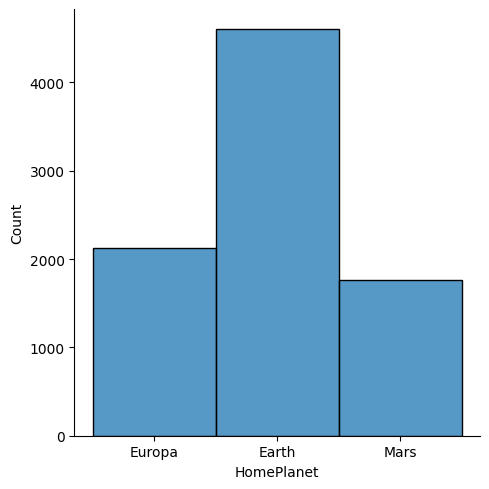

In [17]:
# displot visualization
sns.displot(droplane['HomePlanet'])

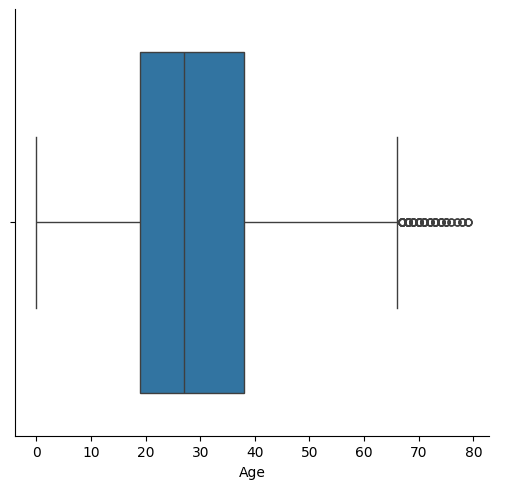

In [18]:
 # Categorical plot
sns.catplot(x='Age' , kind='box' , data=droplane)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [22]:
train_data["Age"].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

In [23]:
train_data["Age"].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [24]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: >

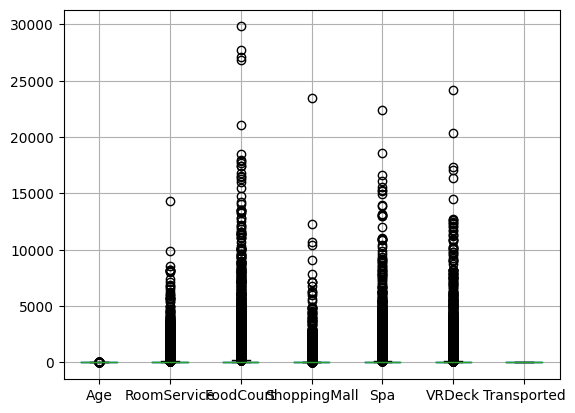

In [25]:
train_data.boxplot()

In [ ]:
# checking size of data frame
test_data.shape

(4277, 13)

In [ ]:
# checking dtype of all columns
test_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [ ]:
# checking the unique values
test_data.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

In [ ]:
# to check the null values
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
dropfile = test_data.drop(['CryoSleep', 'Cabin' , 'Destination' , 'Name' , 'VIP' ], axis = 1)
dropfile.head()


,PassengerId,HomePlanet,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,27.0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,19.0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,31.0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,38.0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,20.0,10.0,0.0,635.0,0.0,0.0


<Axes: >

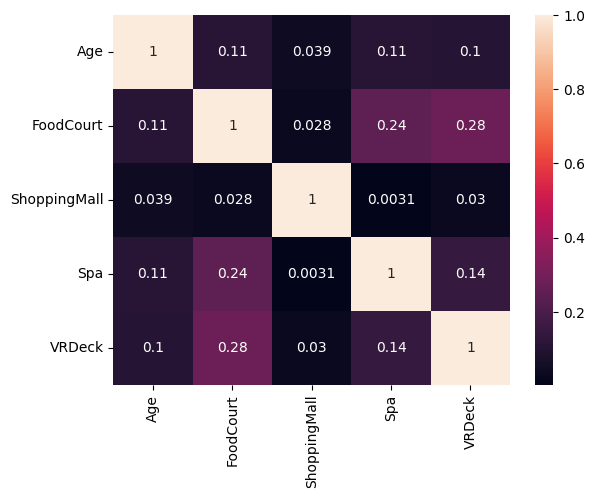

In [ ]:
# explaining the corelation matrix
corelation = dropfile.corr(numeric_only=True)
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)


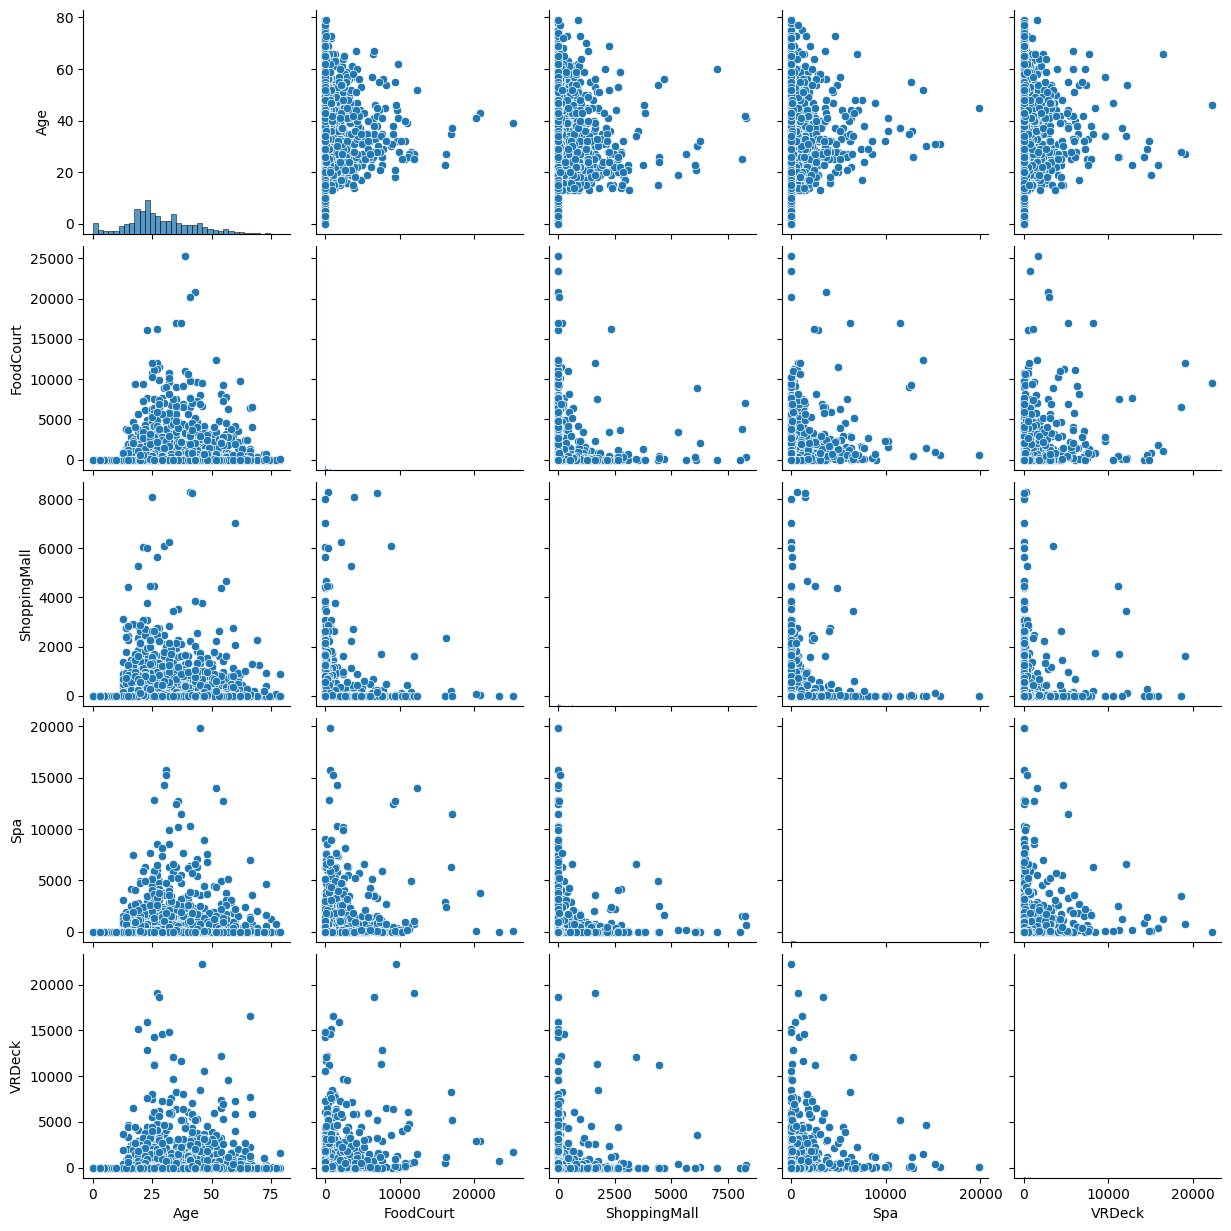

In [ ]:
# Explaining the selected columns in terms of pair plots
sns.pairplot(dropfile)

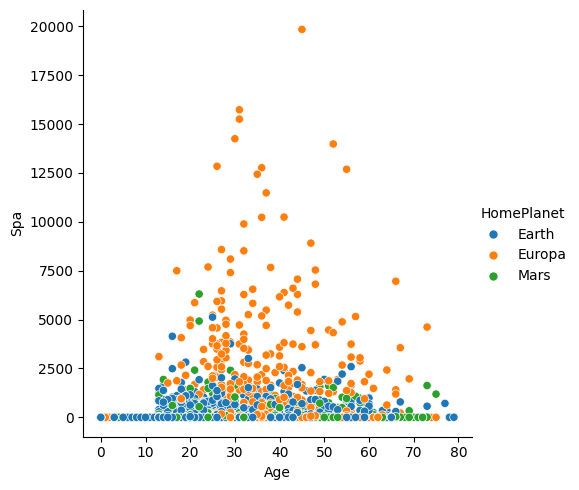

In [ ]:
# relplot shows the relation between the variables
sns.relplot(x='Age' , y='Spa' , hue='HomePlanet' , data=test_data)

<Axes: xlabel='Age', ylabel='Count'>

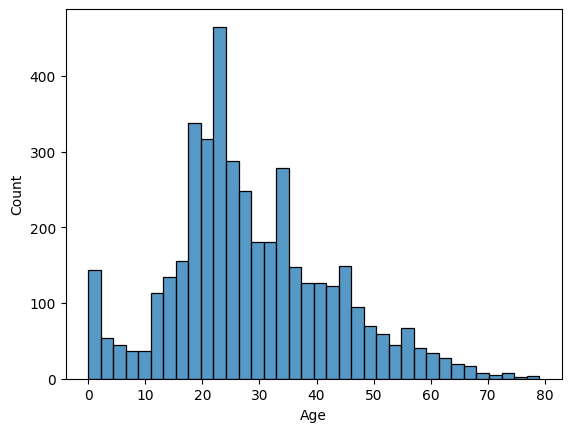

In [ ]:
# Histplot visualization
sns.histplot(dropfile['Age'])

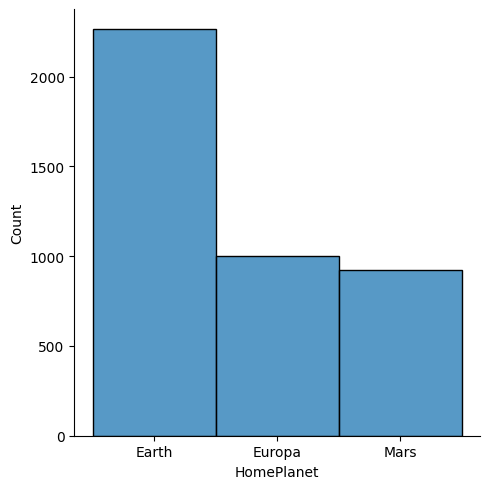

In [ ]:
# displot visualization
sns.displot(dropfile['HomePlanet'])

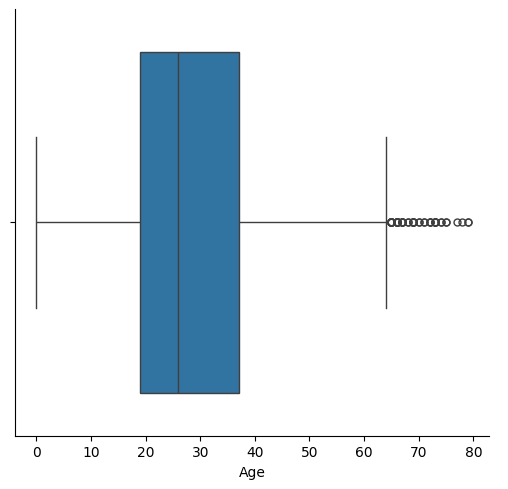

In [ ]:
# Categorical plot
sns.catplot(x='Age' , kind='box' , data=dropfile)

In [ ]:
# checking size of data frame
sample_submission_data

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [ ]:
# checking dtype of all columns
sample_submission_data.dtypes

PassengerId    object
Transported      bool
dtype: object

In [ ]:
# checking the unique values
sample_submission_data.nunique()

PassengerId    4277
Transported       1
dtype: int64

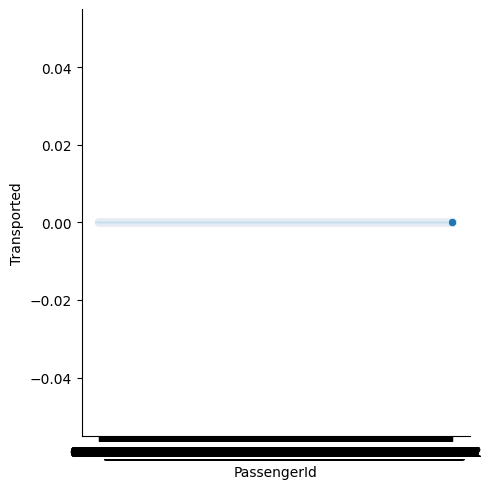

In [ ]:
sns.relplot(x='PassengerId' , y='Transported' , data=sample_submission_data)

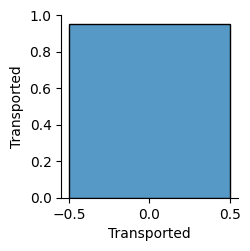

In [ ]:
sns.pairplot(sample_submission_data)

<Axes: xlabel='PassengerId', ylabel='Count'>

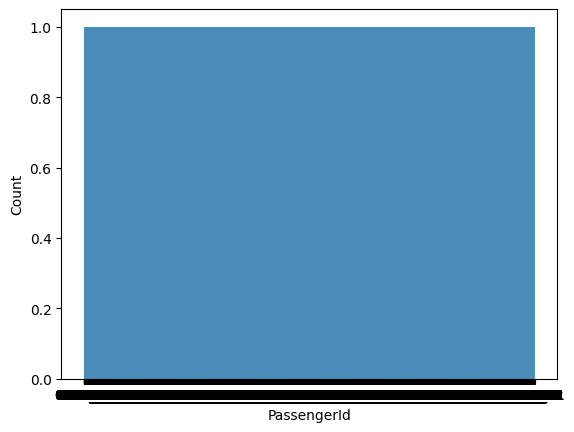

In [ ]:
sns.histplot(dropfile['PassengerId'])

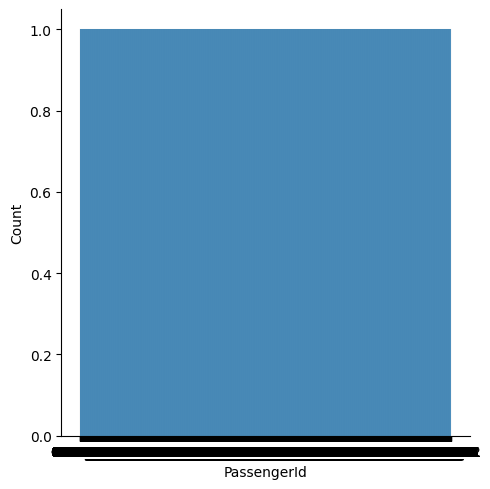

In [ ]:
sns.displot(dropfile['PassengerId'])

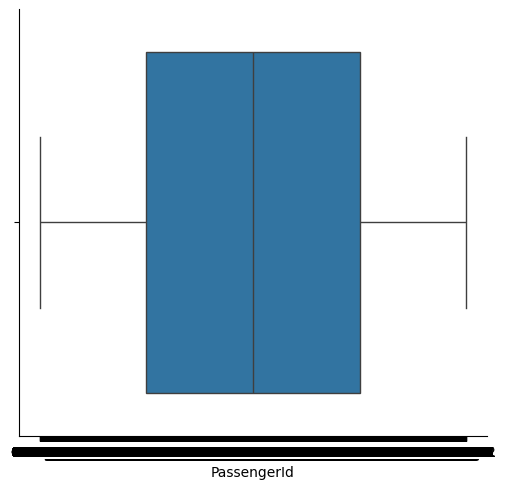

In [ ]:
sns.catplot(x='PassengerId' , kind='box' , data=sample_submission_data)